# Hyperparameter Tuning, Logistic Regression, and Gradient Boosted Trees to Detect Supersymmetry in Simulated Large Hadron Collider 8 TeV Proton Collisions

# Supersymmetry: The Dream and the Current Reality

Supersymmetry has been the dream of a generation of physicists, promising to fix vexing problems with the Standard Model of Particle Physics including the small observed Higgs mass, providing a promising dark matter candidate, and doing useful things for the unification energy of 3 of the fundamental forces. The failure of supersymmetric particles to manifest in experimental searches at the LHC has thrust particle physics into an era of crisis and reassessment.

There has always been some skepticism surrounding supersymmetry. Here is Roger Penrose in his 2004 book,

    "I have found myself to be totally unconvinced of the physical relevance of the scheme of supersymmetry, at least in the form employed in particle physics and underlying theories today." (Penrose, Roger. The road to reality: A complete guide to the laws of the universe. Random house, 2005, page 873)

However, the mainstream of particle physics certainly had (and continue to have in many cases) high hopes for supersymmetry. Stanford particle physicist Michael Peskin echoes the thoughts of many in the physics community in saying,

    "“I was shocked when supersymmetric particles were not discovered in the early days of the    
    LHC." (Symmetry Magazine, The Status of Supersymmetry, 1/21/2021).

Nevertheless, the same Symmetry Magazine article notes,

    The simplest supersymmetric theories—those that best explain the Higgs boson—predict a zoo of new particles with masses comparable to those of the W and Z bosons. Those were within reach of the Large Hadron Collider, so when it turned on in 2009, many particle physicists thought the discovery of super-partners was imminent. But after the triumphant discovery of the Higgs boson came … no more new fundamental particles.

Fortunately for us, we can use the power of Monte Carlo simulation to work out what machine learning strategies and algorithms would have been most successful in detecting supersymmetry signatures in the LHC data if they had manifest. In this notebook we work with a dataset of simulated supersymmetry signatures and train machine learning models to detect the Beyond Standard Model (BSM) physics supersymmetric particles would represent.

We use the "SUSY" dataset from this paper (take a look at the paper for the details on the Monte Carlo simulations for data generation and many interesting discussions on Supersymmetry and Higgs physics as well).

    Baldi, Pierre, Peter Sadowski, and Daniel Whiteson. "Searching for exotic particles in high-energy physics with deep learning." Nature communications 5, no. 1 (2014): 1-9.

### Imports

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, cross_val_score

import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

### Data ingest

In [ ]:
#df_all = pd.read_csv('./data/SUSY.csv', header=None,engine='python')
#print(df_all.shape) # (5,000,000, 19)

In [2]:
df = pd.read_csv('./data/data_susy50K.csv', engine='python')

print(df.shape)
print(df.columns)
df.head(2)

(50000, 19)
Index(['SUSY', 'lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT',
       'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude',
       'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R',
       'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)'],
      dtype='object')


,SUSY,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584


In [3]:
df['SUSY'].value_counts() # balanced, binary classification

0.0    26992
1.0    23008
Name: SUSY, dtype: int64

### Create ML datasets

In [4]:
y = df['SUSY'].values
X = df[[col for col in df.columns if col!="SUSY"]]

print(X.shape, y.shape)

(50000, 18) (50000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)#, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(45000, 18) (45000,) (5000, 18) (5000,)


### Decision Tree

In [7]:
from sklearn import tree

In [24]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)
clf_tree_score = clf_tree.score(X_test, y_test)
print(clf_tree_score)

0.7098


In [10]:
clf_in = []
clf_in = clf_tree
print('classifier: clf_lr')

k_fold = KFold(n_splits=5)

cv_scores_train = cross_val_score(clf_in, X_train, y_train, cv=k_fold, n_jobs=-1, scoring='accuracy')
cv_scores_test = cross_val_score(clf_in, X_test, y_test, cv=k_fold, n_jobs=-1, scoring='accuracy')


print(cv_scores_train)

#print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))
print("CV train %0.3f accuracy with a standard deviation of %0.3f" % (cv_scores_train.mean(), cv_scores_train.std()))
print("CV test %0.3f accuracy with a standard deviation of %0.3f" % (cv_scores_test.mean(), cv_scores_test.std()))


classifier: clf_lr
[0.71122222 0.702      0.71177778 0.70733333 0.71022222]
CV train 0.709 accuracy with a standard deviation of 0.004
CV test 0.708 accuracy with a standard deviation of 0.018


In [53]:
ls_models = []
ls_accuracy = []

In [54]:
ls_models = ls_models + ['Decision Tree']
ls_accuracy = ls_accuracy + [clf_tree_score]

print(ls_models, ls_accuracy)

['Decision Tree'] [0.7098]


### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf_rf = RandomForestClassifier()

clf_rf = clf_rf.fit(X_train, y_train)
clf_rf_score = clf_rf.score(X_test, y_test)
print(clf_rf_score)

0.7978


In [55]:
ls_models = ls_models + ['Random Forest']
ls_accuracy = ls_accuracy + [clf_rf_score]

print(ls_models, ls_accuracy)

['Decision Tree', 'Random Forest'] [0.7098, 0.7978]


### XGBoost simple

In [13]:
import xgboost as xgb

In [29]:
clf_xgb = xgb.sklearn.XGBClassifier()
clf_xgb.fit(X_train, y_train)
clf_xgb_score = clf_xgb.score(X_test, y_test)

C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:50:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [56]:
ls_models = ls_models + ['XGBoost']
ls_accuracy = ls_accuracy + [clf_xgb_score]

print(ls_models, ls_accuracy)

['Decision Tree', 'Random Forest', 'XGBoost'] [0.7098, 0.7978, 0.7986]


In [16]:
clf_in = []
clf_in = clf_xgb
print('classifier: clf_xgb')

k_fold = KFold(n_splits=5)

cv_scores_train = cross_val_score(clf_in, X_train, y_train, cv=k_fold, n_jobs=-1, scoring='accuracy')
cv_scores_test = cross_val_score(clf_in, X_test, y_test, cv=k_fold, n_jobs=-1, scoring='accuracy')


#print(cv_scores)

#print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))
print("CV train %0.3f accuracy with a standard deviation of %0.3f" % (cv_scores_train.mean(), cv_scores_train.std()))
print("CV test %0.3f accuracy with a standard deviation of %0.3f" % (cv_scores_test.mean(), cv_scores_test.std()))


classifier: clf_xgb
CV train 0.793 accuracy with a standard deviation of 0.004
CV test 0.778 accuracy with a standard deviation of 0.010


### XGBoost Hyperparameter Tuning

##### GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

from skopt import BayesSearchCV

from sklearn.metrics import roc_auc_score

In [18]:
#cv_params = {'max_depth': [3,4,6], 'min_child_weight': [1,3,5], 'learning_rate':[0.1,0.3]}
cv_params = {'max_depth': [3,6], 'min_child_weight': [1,5], 'learning_rate':[0.1,0.3]}

ind_params = {'n_estimators': 200, 'seed':1, 'colsample_bytree': 1, 
             'objective': 'binary:logistic'}

In [31]:
# GridSearchCV
opt_XGBclassifier = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                                 cv_params, 
                                 scoring = 'accuracy', 
                                 cv = 2, #3, # =5
                                 n_jobs = -1, 
                                 verbose=3, 
                                 refit=True
                                )

# RandomSearchCV
#opt_XGBclassifier = RandomizedSearchCV(xgb.XGBClassifier(**ind_params), 
#                                 cv_params, 
#                                 n_iter = 5,
#                                 cv = 3,
#                                 scoring = 'accuracy', 
#                                 n_jobs = -1, 
#                                 verbose=3,
#                                  refit=True
#                                  ) # cv = 5

#opt_XGBclassifier = BayesSearchCV(xgb.XGBClassifier(**ind_params), 
#                                  cv_params, 
#                                  n_iter = 5, # n_iter=20
#                                  cv = 3,  #cv = 3,
#                                  scoring = 'accuracy', 
#                                  n_jobs = -1, 
#                                  verbose=3, 
#                                  refit=True
#                                  ) # cv = 5

In [32]:
# gridsearch
opt_XGBclassifier.fit(X_train, y_train) # fitting 3 folds for each of 18 candidates, totalling 54 fits

# randomsearch
#opt_XGBclassifier.fit(X_train, y_train) # Fitting 3 folds for each of 5 candidates, totalling 15 fits

# BayesianSearch
#opt_XGBclassifier.fit(X_train, y_train) # Fitting 3 folds for each of 1 candidates, totalling 3 fits

Fitting 2 folds for each of 18 candidates, totalling 36 fits


C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:54:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                 

In [33]:
#Print scores
print('The optimal score on training set is {:0.3f}'.format(opt_XGBclassifier.best_score_))

#Find optimal parameters

print('The optimal parameters for the classifier are:')
print(opt_XGBclassifier.best_params_)

# gridsearch1 output:
# The optimal score on training set is 0.797
# The optimal parameters for the classifier are:
# {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3}

# randomsearch1 output:
#The optimal score on training set is 0.796
#The optimal parameters for the classifier are:
#{'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.1}

# bayesiansearch1 output:
#The optimal score on training set is 0.798
#The optimal parameters for the classifier are:
#OrderedDict([('learning_rate', 0.14781038524392662), ('max_depth', 4), ('min_child_weight', 5)])

# bayesiansearch2 output (more reps):
#The optimal score on training set is 0.797
#The optimal parameters for the classifier are:
#OrderedDict([('learning_rate', 0.14106882975938184), ('max_depth', 4), ('min_child_weight', 3)])

The optimal score on training set is 0.798
The optimal parameters for the classifier are:
{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5}


In [34]:
#Fit performance on the test set
XGBclassifier_final=opt_XGBclassifier.best_estimator_
y_pred_final=XGBclassifier_final.predict(X_test)

In [35]:
print("Model Accuray with optimal parameters: {:.2f}%".format(100*XGBclassifier_final.score(X_test, y_test)))
print("The  AUC score is {:.2f}".format(roc_auc_score(y_test,y_pred_final)))

# GridSearch1: 
# Model Accuray with optimal parameters: 80.54%
# The  AUC score is 0.80

# RandomSearch1:
# Model Accuray with optimal parameters: 80.32%
# The  AUC score is 0.80
# me: and this was tons faster !!!

# BayesianSearch1:
#Model Accuray with optimal parameters: 80.24%
#The  AUC score is 0.80

Model Accuray with optimal parameters: 80.14%
The  AUC score is 0.79


In [36]:
clf_xgbtuned_score = XGBclassifier_final.score(X_test, y_test)
print(clf_xgbtuned_score)

0.8014


In [57]:
ls_models = ls_models + ['XGBoost-Tuned']
ls_accuracy = ls_accuracy + [clf_xgbtuned_score]

print(ls_models, ls_accuracy)

['Decision Tree', 'Random Forest', 'XGBoost', 'XGBoost-Tuned'] [0.7098, 0.7978, 0.7986, 0.8014]


### SKOPT Viz

In [ ]:
from skopt.plots import plot_objective

In [ ]:
# https://scikit-optimize.github.io/stable/auto_examples/plots/partial-dependence-plot.html#sphx-glr-auto-examples-plots-partial-dependence-plot-py

#_ = plot_objective(opt_XGBclassifier) # AttributeError: 'BayesSearchCV' object has no attribute 'space'

# figure out skopt viz's at other time

In [ ]:
#opt_XGBclassifier

### AutoGluon - AutoML Strategy

In [38]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [39]:
print(df.shape)
print(df.columns)
df.head(2)

(50000, 19)
Index(['SUSY', 'lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT',
       'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude',
       'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R',
       'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)'],
      dtype='object')


,SUSY,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584


In [40]:
print(X_train.shape, X_test.shape)

(45000, 18) (5000, 18)


In [41]:
df.shape

(50000, 19)

In [42]:
df_train = df.head(45000)
df_test = df.tail(5000)

print(df.shape, df_train.shape, df_test.shape)

(50000, 19) (45000, 19) (5000, 19)


In [43]:
df_train['SUSY'].value_counts()

0.0    24251
1.0    20749
Name: SUSY, dtype: int64

In [44]:
df_test['SUSY'].value_counts()

0.0    2741
1.0    2259
Name: SUSY, dtype: int64

In [45]:
save_path = 'agModels-predictClass'  # specifies folder to store trained models
#predictor = TabularPredictor(label=label, path=save_path).fit(train_data)


label='SUSY'
predictor = TabularPredictor(label=label, path=save_path).fit(df_train)

Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClass\"
AutoGluon Version:  0.4.0
Python Version:     3.8.5
Operating System:   Windows
Train Data Rows:    45000
Train Data Columns: 18
Label Column: SUSY
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0.0, 1.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    23067.07 MB
	Train Data (Original)  Memory Usage: 6.48 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of t

In [ ]:
# predictor = TabularPredictor.load(save_path)  # unnecessary, just demonstrates how to load previously-trained predictor from file



In [46]:
df_y_test = df_test['SUSY']
df_X_test = df_test.drop(columns=['SUSY'])

print(df_test.shape, df_X_test.shape, df_y_test.shape)

(5000, 19) (5000, 18) (5000,)


In [47]:
y_pred = predictor.predict(df_X_test)

In [48]:
print("Predictions:  \n", y_pred)

Predictions:  
 45000    1.0
45001    1.0
45002    0.0
45003    1.0
45004    1.0
        ... 
49995    0.0
49996    1.0
49997    0.0
49998    1.0
49999    0.0
Name: SUSY, Length: 5000, dtype: float64


In [49]:
perf = predictor.evaluate_predictions(y_true=df_y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.801
Evaluations on test data:
{
    "accuracy": 0.801,
    "balanced_accuracy": 0.793119951989036,
    "mcc": 0.598164705962723,
    "f1": 0.7636018056545497,
    "precision": 0.8241025641025641,
    "recall": 0.7113767153607791
}


In [50]:
predictor.leaderboard(df_test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.8010,0.8052,0.042665,0.017368,1.763744,0.042665,0.017368,1.763744,1,True,9
1,WeightedEnsemble_L2,0.8010,0.8056,0.623959,0.106600,6.793103,0.000000,0.000000,1.052806,2,True,12
2,LightGBM,0.7998,0.8004,0.000000,0.025983,0.566299,0.000000,0.025983,0.566299,1,True,4
3,ExtraTreesEntr,0.7992,0.8008,0.565665,0.160558,4.321471,0.565665,0.160558,4.321471,1,True,8
4,ExtraTreesGini,0.7982,0.7992,0.581294,0.089232,3.976553,0.581294,0.089232,3.976553,1,True,7
5,RandomForestGini,0.7974,0.7964,0.309770,0.083811,18.152966,0.309770,0.083811,18.152966,1,True,5
6,LightGBMLarge,0.7970,0.8008,0.052816,0.039969,1.710683,0.052816,0.039969,1.710683,1,True,11
7,NeuralNetTorch,0.7960,0.7952,0.100431,0.057958,66.405329,0.100431,0.057958,66.405329,1,True,10
8,RandomForestEntr,0.7952,0.7932,0.313182,0.129996,41.620233,0.313182,0.129996,41.620233,1,True,6
9,LightGBMXT,0.7944,0.8032,0.000996,0.019883,7.187729,0.000996,0.019883,7.187729,1,True,3


In [58]:
ls_models = ls_models + ['AutoML-AutoGluon-Stacking']
ls_accuracy = ls_accuracy + [0.801]

print(ls_models, ls_accuracy)

['Decision Tree', 'Random Forest', 'XGBoost', 'XGBoost-Tuned', 'AutoML-AutoGluon-Stacking'] [0.7098, 0.7978, 0.7986, 0.8014, 0.801]


### Eval Models

In [59]:
df_eval = pd.DataFrame({'Model': ls_models, 'Test Accuracy': ls_accuracy})
df_eval

,Model,Test Accuracy
0,Decision Tree,0.7098
1,Random Forest,0.7978
2,XGBoost,0.7986
3,XGBoost-Tuned,0.8014
4,AutoML-AutoGluon-Stacking,0.8010


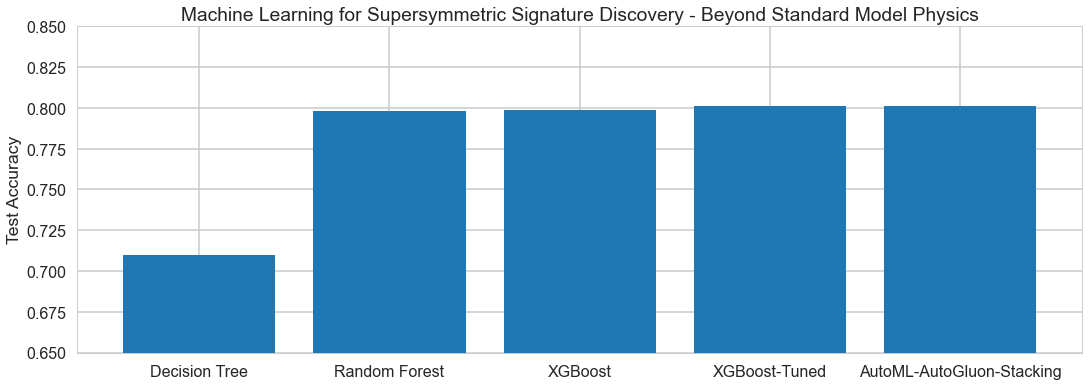

In [76]:
plt.figure(figsize=(18,6))
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')
plt.bar(df_eval['Model'], df_eval['Test Accuracy'])
plt.ylabel('Test Accuracy')
plt.ylim(0.65, 0.85);
plt.title('Machine Learning for Supersymmetric Signature Discovery - Beyond Standard Model Physics');

We see that the biggest increase in model performance comes with the move to ensembling strategies (i.e., bagging, boosting, stacking), the differences in the ensembling strategies have only marginal effects (though boosting does outperform bagging as is generally expected). Note that the AutoML stacking strategies was only allowed to run briefly, performance will likely improve with additional computational resourcces devoted to this thrust. 